<a href="https://colab.research.google.com/github/adbioc/Thermal-Image-Nanorod/blob/main/Control4rod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import cv2
import math
import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/
import scipy as sp # for signal processing
from scipy import signal
from scipy.spatial import distance # Important for calculating the distance 
import skimage.io
import IPython.display as ipd
import librosa
import random

In [3]:
def v2im(videofile):
  cap=cv2.VideoCapture(videofile)
  frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  return(frameCount,frameWidth,frameHeight)

In [4]:
def bufproc(video,N):
  cap=cv2.VideoCapture(video)
  frameCount, frameHeight, frameWidth=v2im(video)
  frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))
  fc=0
  ret=True
  while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1
  cap.release()
  im=buf[N,:,:,1]
  #plt.imshow(im)
  return im,buf

In [5]:
def im2gray(video,N,x,y,h,w):
  im,buf=bufproc(video,N)
  grayFrame = cv2.cvtColor(buf[N,:,:,:], cv2.COLOR_BGR2GRAY)
  crop_img = grayFrame[y:y+h, x:x+w]
  #plt.imshow(crop_img,cmap ='gray')
  return crop_img


In [6]:
def TS(video,x,y,h,w,low,high):
  C,W,H=v2im(video)
  TS = np.zeros(C,)
  for t in range(C):
    crop_img=im2gray(video,t,x,y,h,w)
    i,j = np.where((crop_img>low)&(crop_img<high))
    AA= crop_img[i,j]
    TS[t] = AA.mean()
  plt.plot(TS)
  return TS


In [7]:
def TShort(crop_img,C,low,high):
    TShort = np.zeros(C,)
    for t in range(C):
        i,j = np.where((crop_img>low)&(crop_img<high))
        AA= crop_img[i,j]
    TShort[t] = AA.mean()
    #plt.plot(TShort)
    return TShort

In [8]:
def TS_gap(video,gap,x,y,h,w,low,high):
  C,W,H=v2im(video)
  c_seq=list(range(1000,C,gap))
  TS = np.zeros(len(c_seq))
  count=0
  for t in c_seq:
    crop_img=im2gray(video,t,x,y,h,w)
    print(t)
    i,j = np.where((crop_img>low)&(crop_img<high))
    AA= crop_img[i,j]
    TS[count] = AA.mean()
    count+=1
  plt.plot(TS)
  return TS

In [9]:
def diffusion_cum(count,gap,a,b):
 count_seq=list(range(1,count,gap))
 l=len(count_seq)-1
 diffusion_cum=[]
 diffusion=[]
 for i in count_seq:
   aa=a[i]
   bb=b[i]
   diffusion_cum.append((aa-bb)**2/i)
   diffusion.append((aa-bb)**2/gap)
 plt.plot(count_seq,diffusion_cum)
 plt.show()
 plt.plot(count_seq,diffusion)
 plt.show
 diffusion_mean=sum(diffusion)/len(diffusion)
 return diffusion_cum,diffusion,count_seq,diffusion_mean


In [10]:
os.chdir("/content/drive/My Drive/thermal_hirak")
video='Alginate2.mp4'

In [20]:
C1,W1,H1=v2im(video)

im1,buf1=bufproc(video,2000)
print(C1)

4878


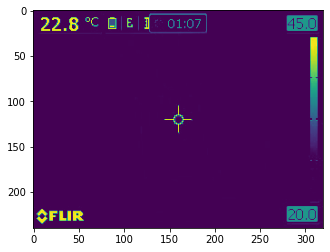

In [22]:
plt.imshow(im1)
plt.show()

In [35]:
h=25
w=15
x=130
y=100
crop_img_C1=im2gray(video,2000,x,y,h,w)

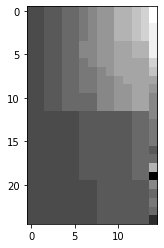

In [36]:
plt.imshow(crop_img_C1,cmap='gray')

In [ ]:
low=10
high=20
gap=100
h=25
w=15
x=140
y=95
a=TS_gap(video,gap,x,y,h,w,low,high)
low=30
high=50
b=TS_gap(video,gap,x,y,h,w,low,high)



In [38]:
# ik=np.argwhere(np.isnan(b))
# new_a = np.delete(a, ik)
# new_b=np.delete(b,ik)


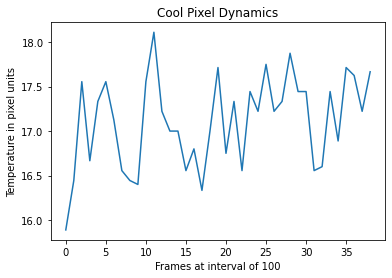

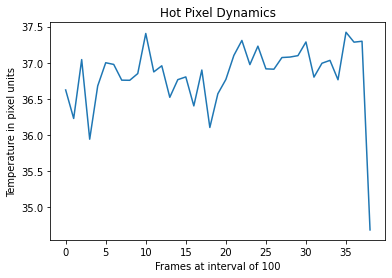

In [45]:
plt.plot(a)
plt.title("Cool Pixel Dynamics")
plt.xlabel("Frames at interval of 100")
plt.ylabel("Temperature in pixel units")
plt.figure()

plt.plot(b)
plt.title("Hot Pixel Dynamics")
plt.xlabel("Frames at interval of 100")
plt.ylabel("Temperature in pixel units")
plt.show()

Inference: No dynamics difference between hot and cool pixels